
Загрузка датасета...

Loading dataset...

Фильтрация данных...

Filtering data...

Преобразование целевой переменной...

Transforming target variable...

Анализ типов данных:

Data types analysis:
_id                          object
TimeStamp                    object
PART_FACT_PLAN_DATE          object
PART_FACT_SERIAL              int64
PART_NAME                    object
EQUIP_CD                     object
EQUIP_NAME                   object
PassOrFail                    int64
Reason                       object
Injection_Time              float64
Filling_Time                float64
Plasticizing_Time           float64
Cycle_Time                  float64
Clamp_Close_Time            float64
Cushion_Position            float64
Switch_Over_Position        float64
Plasticizing_Position       float64
Clamp_Open_Position         float64
Max_Injection_Speed         float64
Max_Screw_RPM               float64
Average_Screw_RPM           float64
Max_Injection_Pressure      float64
Max_Switch

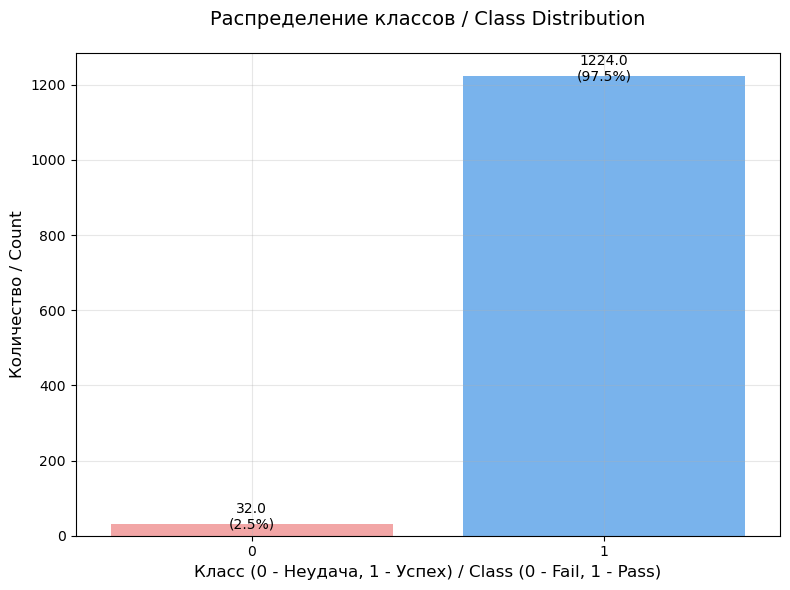


Удаление нечисловых колонок...

Removing non-numeric columns...

Удаление колонок с нулевыми значениями...

Removing columns with zero values...

Удаление колонок с одной уникальной переменной...

Removing columns with single unique value...

Анализ пропущенных значений:

Missing values analysis:
Series([], dtype: int64)

Удаление колонок с высокой долей пропущенных значений...

Removing columns with high percentage of missing values...

Анализ выбросов...

Outliers analysis...

Количество выбросов по признакам:

Number of outliers by features:
PART_FACT_SERIAL             84
PassOrFail                   32
Injection_Time               90
Filling_Time                  1
Plasticizing_Time            71
Cycle_Time                   72
Clamp_Close_Time              0
Cushion_Position              0
Switch_Over_Position          4
Plasticizing_Position        11
Max_Injection_Speed          71
Max_Screw_RPM                18
Average_Screw_RPM            74
Max_Injection_Pressure       86


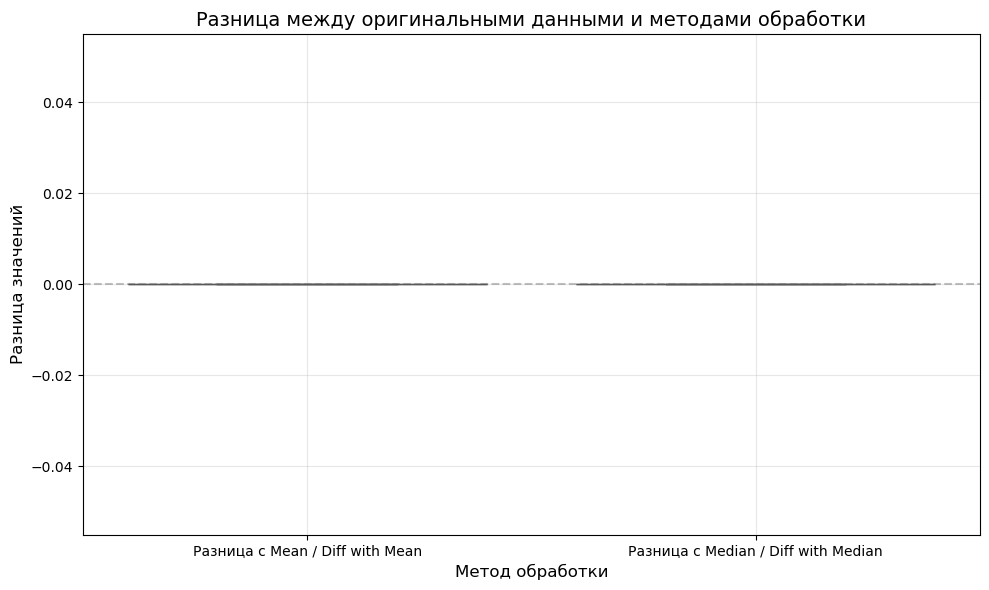


Разделение данных на train и test...

Splitting data into train and test...

Нормализация данных...

Normalizing data...


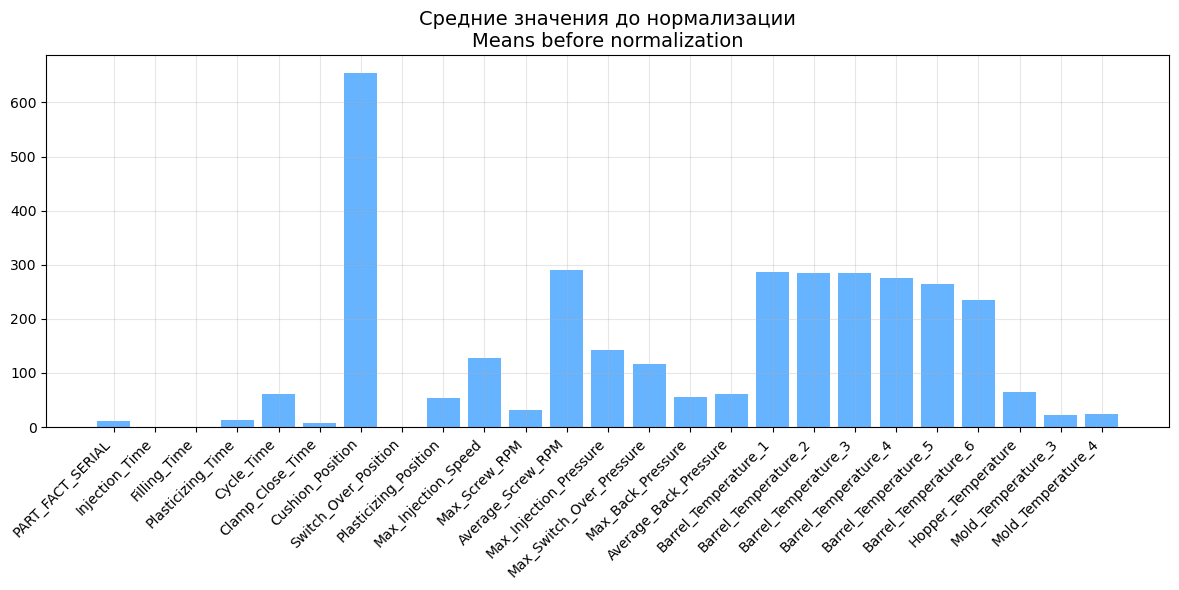

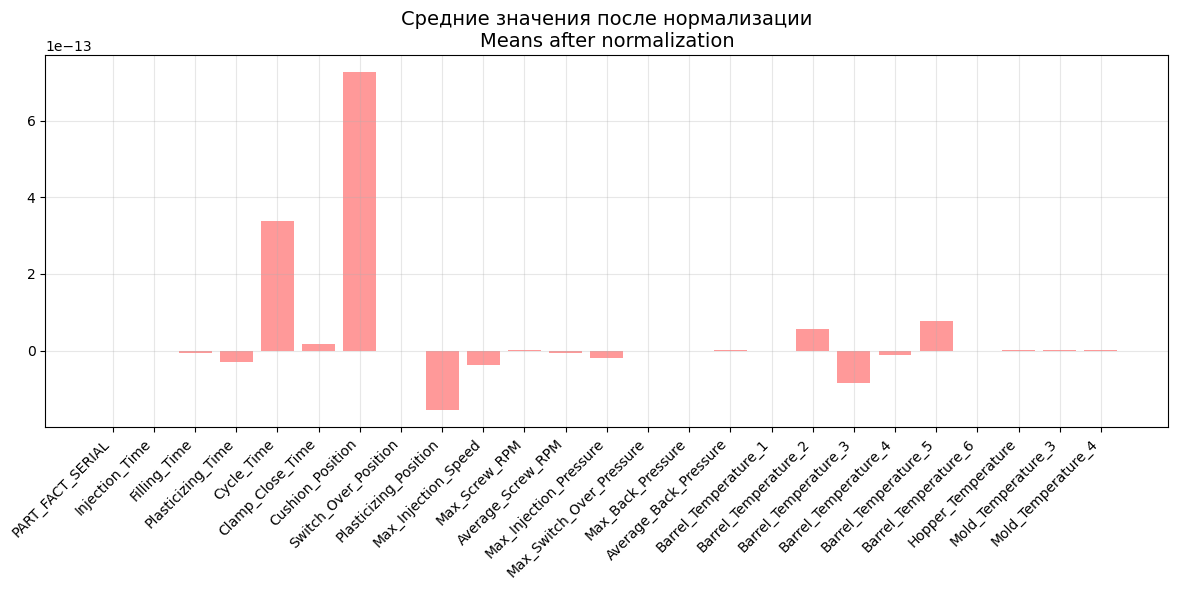


Визуализация методов балансировки...

Visualizing balancing methods...


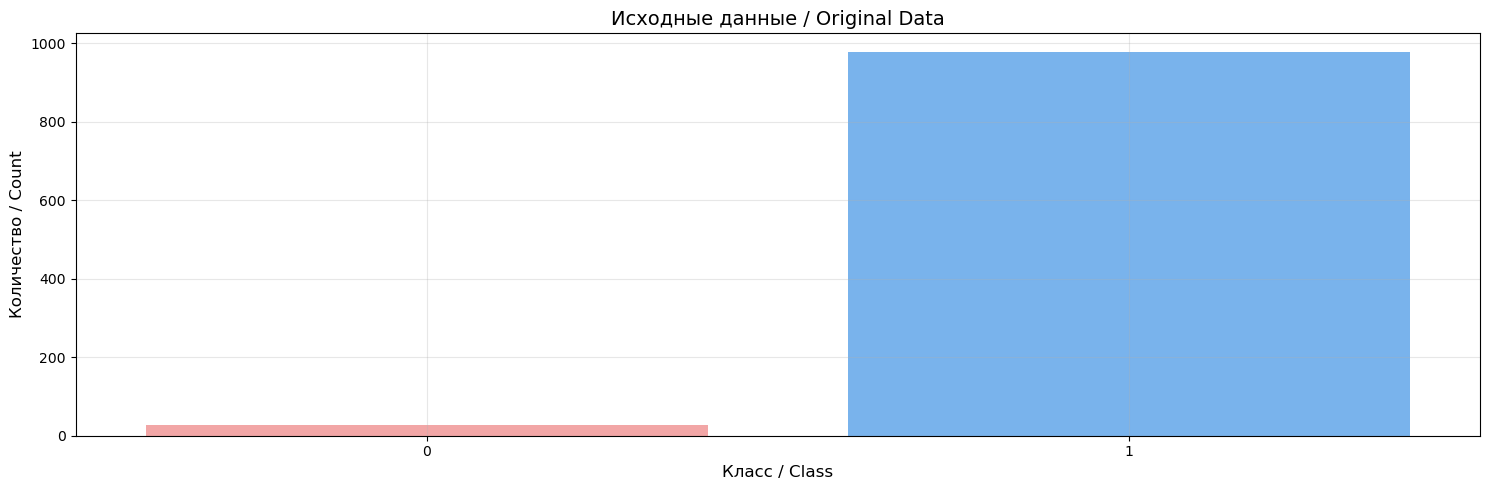

  File "C:\Users\User\anaconda3\envs\senior_level\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


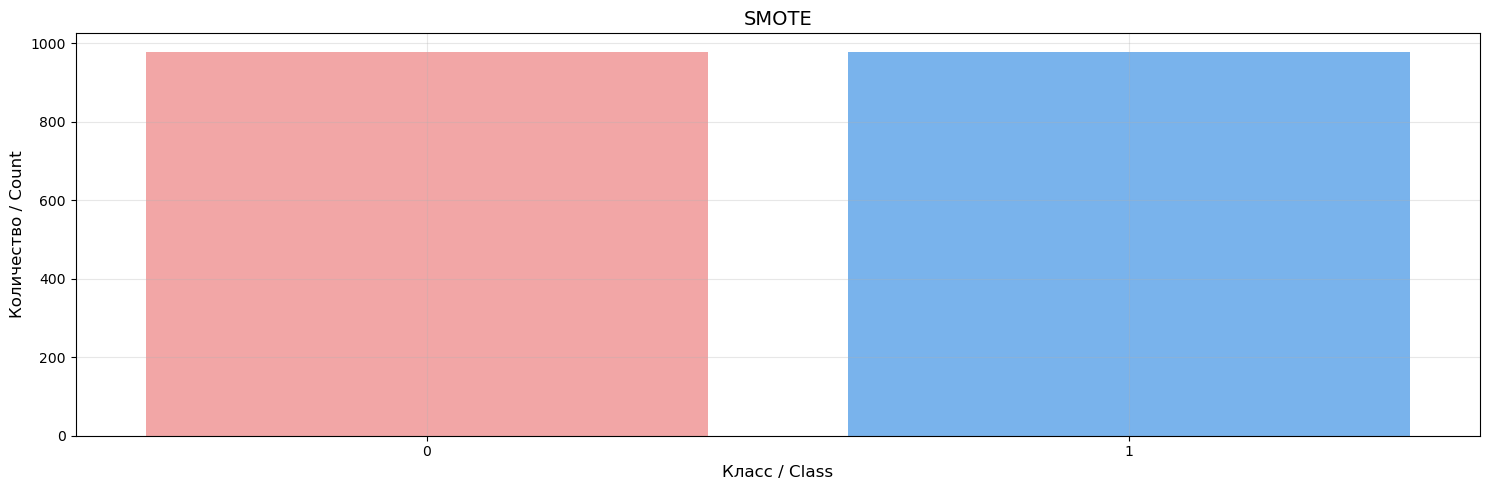

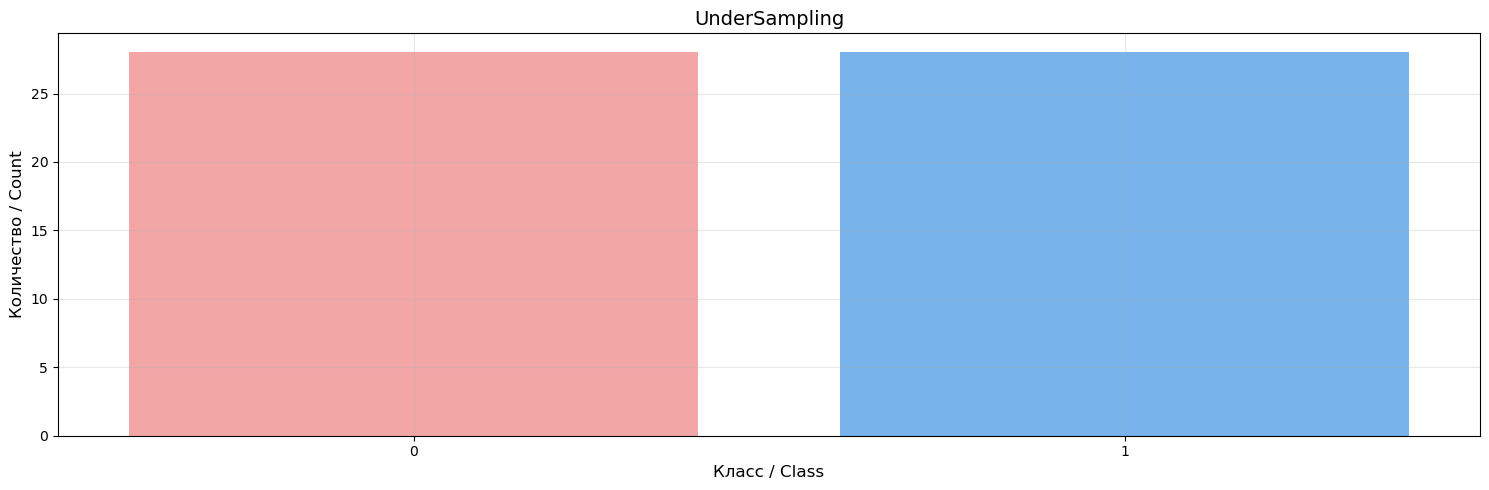

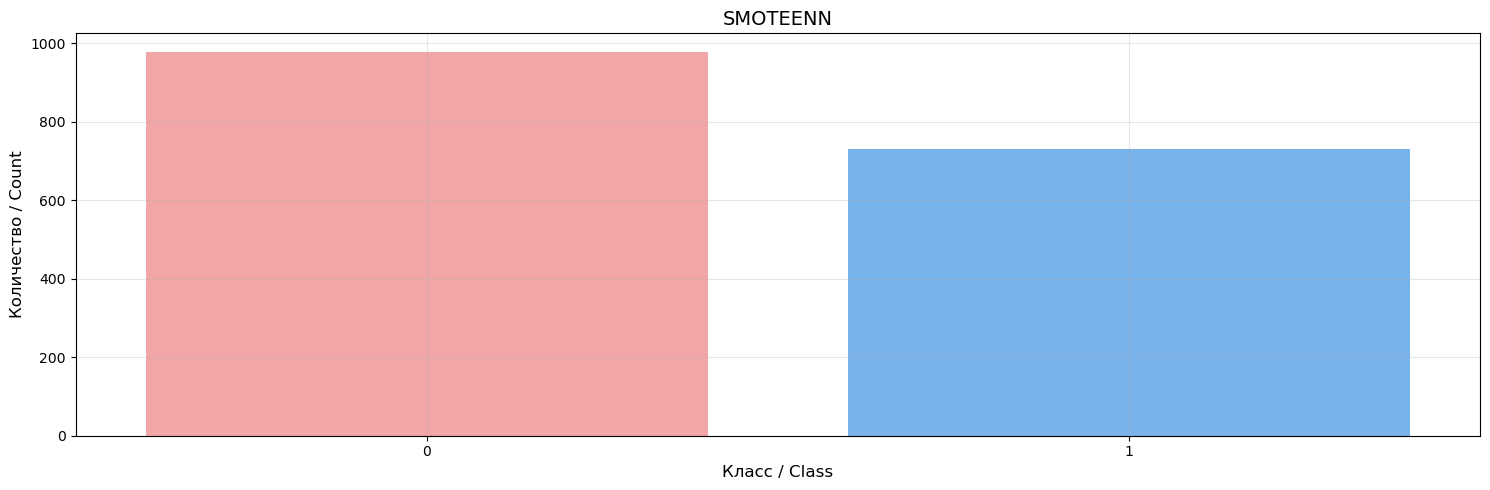

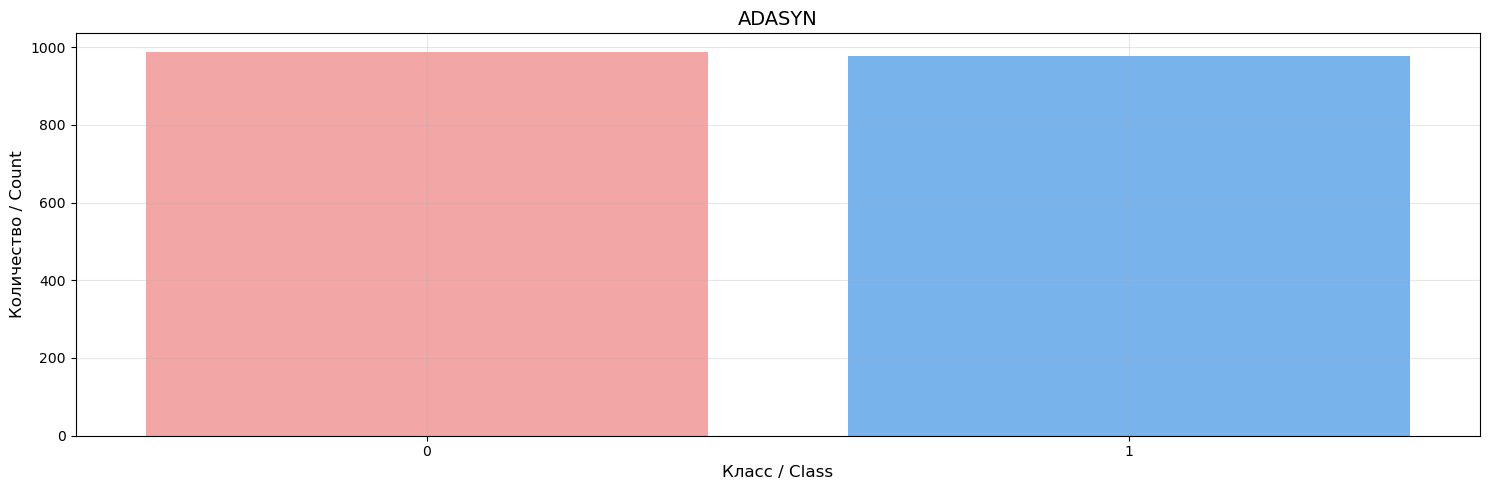

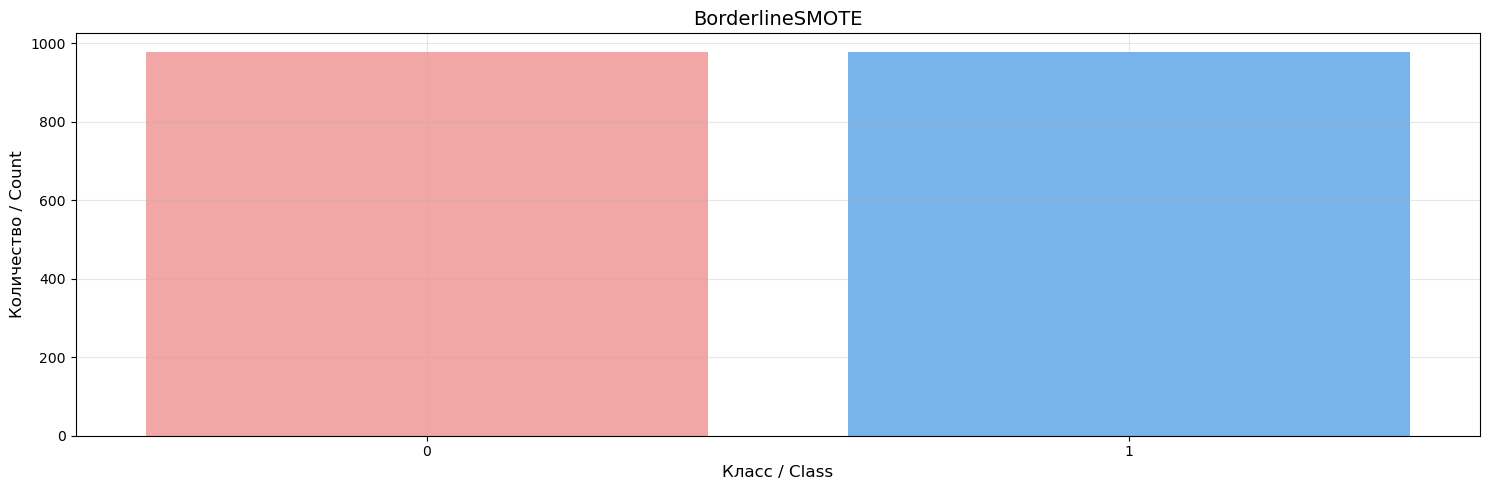


Поиск лучших параметров для Logistic Regression...

Finding best parameters for Logistic Regression...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Лучшие параметры для Logistic Regression:

Best parameters for Logistic Regression:
{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Лучший ROC AUC: 0.5000
Best ROC AUC: 0.5000

Поиск лучших параметров для Random Forest...

Finding best parameters for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

In [1]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import pandas as pd
import numpy as np
from model import df_filtered, X, y, results_df, best_model_pipeline

In [ ]:
# Импорт необходимых библиотек
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import pandas as pd
import numpy as np
import sys
import traceback
import os

# Импорт данных из model.py
try:
    from model import df_filtered, X, y, results_df, best_model_pipeline
except Exception as e:
    print(f"Ошибка при импорте из model.py: {str(e)}")
    print("Пробуем загрузить данные из файлов...")
    
    # Загружаем results_df из файла
    if os.path.exists('results_df.csv'):
        results_df = pd.read_csv('results_df.csv')
        print("results_df успешно загружен из файла")
    else:
        print("Файл results_df.csv не найден")
        sys.exit(1)

print("Структура results_df:")
print("Колонки:", results_df.columns.tolist())
print("Размер:", results_df.shape)
print("Первая строка:")
print(results_df.iloc[0])

def create_presentation():
    try:
        # Создание PDF файла
        with PdfPages('model_analysis_presentation.pdf') as pdf:
            # Установка стиля для графиков
            plt.style.use('ggplot')
            
            # Титульный слайд
            plt.figure(figsize=(15, 10))
            plt.text(0.5, 0.5, 'Анализ моделей машинного обучения\nдля предсказания PassOrFail',
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=24, fontweight='bold')
            plt.axis('off')
            pdf.savefig(bbox_inches='tight')
            plt.close()
            
            # Слайд с описанием данных
            plt.figure(figsize=(15, 10))
            plt.text(0.1, 0.8, 'Описание данных:', fontsize=20, fontweight='bold')
            plt.text(0.1, 0.7, f'Количество наблюдений: {len(df_filtered)}', fontsize=16)
            plt.text(0.1, 0.6, f'Количество признаков: {len(X.columns)}', fontsize=16)
            class_distribution = df_filtered["PassOrFail"].value_counts(normalize=True)
            plt.text(0.1, 0.5, f'Распределение классов:\n{class_distribution.to_string()}', fontsize=16)
            plt.axis('off')
            pdf.savefig(bbox_inches='tight')
            plt.close()
            
            # Слайд с визуализацией распределения классов
            plt.figure(figsize=(15, 10))
            sns.countplot(x='PassOrFail', data=df_filtered)
            plt.title('Распределение классов в датасете', fontsize=20, pad=20)
            plt.xlabel('Класс (0 - Неудача, 1 - Успех)', fontsize=14)
            plt.ylabel('Количество', fontsize=14)
            plt.grid(True, alpha=0.3)
            pdf.savefig(bbox_inches='tight')
            plt.close()
            
            # Слайд с описанием предобработки данных
            plt.figure(figsize=(15, 10))
            plt.text(0.1, 0.8, 'Предобработка данных:', fontsize=20, fontweight='bold')
            preprocessing_steps = [
                '1. Загрузка и фильтрация данных',
                '2. Преобразование целевой переменной',
                '3. Анализ типов данных',
                '4. Удаление нечисловых колонок',
                '5. Удаление колонок с нулевыми значениями',
                '6. Удаление колонок с одной уникальной переменной',
                '7. Удаление колонок с высокой долей пропущенных значений',
                '8. Анализ корреляций',
                '9. Удаление коррелирующих признаков',
                '10. Обработка пропущенных значений',
                '11. Обработка выбросов',
                '12. Нормализация признаков'
            ]
            for i, step in enumerate(preprocessing_steps):
                plt.text(0.1, 0.7 - i*0.05, step, fontsize=16)
            plt.axis('off')
            pdf.savefig(bbox_inches='tight')
            plt.close()
            
            # Слайд с анализом типов данных
            plt.figure(figsize=(15, 10))
            plt.text(0.1, 0.8, 'Анализ типов данных:', fontsize=20, fontweight='bold')
            dtypes_str = df_filtered.dtypes.to_string()
            plt.text(0.1, 0.6, dtypes_str, fontsize=14, family='monospace')
            plt.axis('off')
            pdf.savefig(bbox_inches='tight')
            plt.close()
            
            # Слайд с анализом пропущенных значений
            plt.figure(figsize=(15, 10))
            missing_values = df_filtered.isnull().sum()
            plt.bar(range(len(missing_values)), missing_values.values)
            plt.title('Количество пропущенных значений по признакам', fontsize=20, pad=20)
            plt.xticks(range(len(missing_values)), missing_values.index, rotation=45, ha='right')
            plt.ylabel('Количество пропущенных значений', fontsize=14)
            plt.grid(True, alpha=0.3)
            pdf.savefig(bbox_inches='tight')
            plt.close()
            
            # Слайд с анализом корреляций
            plt.figure(figsize=(15, 10))
            correlation_matrix = df_filtered.corr()
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
                       xticklabels=True, yticklabels=True)
            plt.title('Матрица корреляций', fontsize=20, pad=20)
            plt.tight_layout()
            pdf.savefig(bbox_inches='tight')
            plt.close()
            
            # Слайд с анализом выбросов
            plt.figure(figsize=(15, 10))
            Q1 = df_filtered.quantile(0.25)
            Q3 = df_filtered.quantile(0.75)
            IQR = Q3 - Q1
            outliers = ((df_filtered < (Q1 - 1.5 * IQR)) | (df_filtered > (Q3 + 1.5 * IQR))).sum()
            plt.text(0.1, 0.8, 'Анализ выбросов:', fontsize=20, fontweight='bold')
            plt.text(0.1, 0.7, 'Количество выбросов по признакам:', fontsize=16)
            plt.text(0.1, 0.6, outliers.to_string(), fontsize=14, family='monospace')
            plt.axis('off')
            pdf.savefig(bbox_inches='tight')
            plt.close()
            
            # Слайд с визуализацией выбросов
            plt.figure(figsize=(15, 10))
            sns.boxplot(data=df_filtered)
            plt.title('Boxplot признаков', fontsize=20, pad=20)
            plt.xticks(rotation=45, ha='right')
            plt.grid(True, alpha=0.3)
            pdf.savefig(bbox_inches='tight')
            plt.close()
            
            # Слайд с распределением признаков до нормализации
            plt.figure(figsize=(15, 10))
            for i, col in enumerate(df_filtered.columns, 1):
                plt.subplot(3, 3, i)
                sns.histplot(data=df_filtered[col], kde=True)
                plt.title(f'Распределение {col}', fontsize=12)
                plt.grid(True, alpha=0.3)
                if i == 9:  # Ограничиваем количество графиков
                    break
            plt.tight_layout()
            pdf.savefig(bbox_inches='tight')
            plt.close()
            
            # Слайд с распределением признаков после нормализации
            plt.figure(figsize=(15, 10))
            for i, col in enumerate(X.columns, 1):
                plt.subplot(3, 3, i)
                sns.histplot(data=X[col], kde=True)
                plt.title(f'Распределение {col} (нормализованное)', fontsize=12)
                plt.grid(True, alpha=0.3)
                if i == 9:  # Ограничиваем количество графиков
                    break
            plt.tight_layout()
            pdf.savefig(bbox_inches='tight')
            plt.close()
            
            # Слайд с итоговым набором признаков
            plt.figure(figsize=(15, 10))
            plt.text(0.1, 0.8, 'Итоговый набор признаков:', fontsize=20, fontweight='bold')
            plt.text(0.1, 0.7, f'Количество признаков до предобработки: {len(df_filtered.columns)}', fontsize=16)
            plt.text(0.1, 0.6, f'Количество признаков после предобработки: {len(X.columns)}', fontsize=16)
            plt.text(0.1, 0.5, 'Оставшиеся признаки:', fontsize=16)
            plt.text(0.1, 0.4, '\n'.join(X.columns), fontsize=14, family='monospace')
            plt.axis('off')
            pdf.savefig(bbox_inches='tight')
            plt.close()
            
            # Слайд с описанием моделей
            plt.figure(figsize=(15, 10))
            plt.text(0.1, 0.8, 'Использованные модели:', fontsize=20, fontweight='bold')
            models = [
                '1. Logistic Regression',
                '2. Random Forest',
                '3. Gradient Boosting',
                '4. SVM',
                '5. KNN',
                '6. XGBoost',
                '7. LightGBM',
                '8. CatBoost',
                '9. AdaBoost',
                '10. Decision Tree',
                '11. Extra Trees',
                '12. Bagging'
            ]
            for i, model in enumerate(models):
                plt.text(0.1, 0.7 - i*0.05, model, fontsize=16)
            plt.axis('off')
            pdf.savefig(bbox_inches='tight')
            plt.close()
            
            # Слайд с методами балансировки
            plt.figure(figsize=(15, 10))
            plt.text(0.1, 0.8, 'Методы балансировки классов:', fontsize=20, fontweight='bold')
            balancing_methods = [
                '1. Original (без балансировки)',
                '2. SMOTE',
                '3. Random UnderSampling',
                '4. SMOTEENN',
                '5. ADASYN',
                '6. BorderlineSMOTE',
                '7. Class Weight'
            ]
            for i, method in enumerate(balancing_methods):
                plt.text(0.1, 0.7 - i*0.05, method, fontsize=16)
            plt.axis('off')
            pdf.savefig(bbox_inches='tight')
            plt.close()
            
            # Слайд с ROC-кривыми
            plt.figure(figsize=(15, 10))
            plt.text(0.1, 0.8, 'ROC-кривые моделей:', fontsize=20, fontweight='bold')
            roc_info = [
                'ROC-кривая показывает соотношение между:',
                '- True Positive Rate (TPR)',
                '- False Positive Rate (FPR)',
                'AUC-ROC показывает общую производительность модели'
            ]
            for i, info in enumerate(roc_info):
                plt.text(0.1, 0.7 - i*0.05, info, fontsize=16)
            plt.axis('off')
            pdf.savefig(bbox_inches='tight')
            plt.close()
            
            # Слайд с результатами
            plt.figure(figsize=(15, 10))
            plt.text(0.1, 0.8, 'Результаты моделей:', fontsize=20, fontweight='bold')
            best_model = results_df.loc[results_df['roc_auc'].idxmax()]
            plt.text(0.1, 0.7, f'Лучшая модель: {best_model["model"]}', fontsize=16)
            plt.text(0.1, 0.6, f'Метод балансировки: {best_model["sampling"]}', fontsize=16)
            plt.text(0.1, 0.5, f'AUC-ROC: {best_model["roc_auc"]:.3f}', fontsize=16)
            plt.text(0.1, 0.4, f'Precision: {best_model["precision"]:.3f}', fontsize=16)
            plt.text(0.1, 0.3, f'Recall: {best_model["recall"]:.3f}', fontsize=16)
            plt.text(0.1, 0.2, f'F1-score: {best_model["f1"]:.3f}', fontsize=16)
            plt.axis('off')
            pdf.savefig(bbox_inches='tight')
            plt.close()
            
            # Слайд с важностью признаков
            plt.figure(figsize=(15, 10))
            plt.text(0.1, 0.8, 'Важность признаков:', fontsize=20, fontweight='bold')
            feature_importance_info = [
                'Анализ важности признаков показывает:',
                '1. Какие признаки наиболее значимы для предсказания',
                '2. Какие признаки можно исключить',
                '3. Взаимосвязи между признаками'
            ]
            for i, info in enumerate(feature_importance_info):
                plt.text(0.1, 0.7 - i*0.05, info, fontsize=16)
            plt.axis('off')
            pdf.savefig(bbox_inches='tight')
            plt.close()
            
            # Слайд с итоговым пайплайном
            plt.figure(figsize=(15, 10))
            plt.text(0.1, 0.8, 'Итоговый пайплайн:', fontsize=20, fontweight='bold')
            pipeline_steps = [
                '1. Предобработка данных',
                '2. Нормализация признаков',
                '3. Балансировка классов',
                '4. Обучение модели',
                '5. Предсказание'
            ]
            for i, step in enumerate(pipeline_steps):
                plt.text(0.1, 0.7 - i*0.05, step, fontsize=16)
            plt.axis('off')
            pdf.savefig(bbox_inches='tight')
            plt.close()
            
            # Заключительный слайд
            plt.figure(figsize=(15, 10))
            plt.text(0.5, 0.5, 'Спасибо за внимание!',
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=24, fontweight='bold')
            plt.axis('off')
            pdf.savefig(bbox_inches='tight')
            plt.close()
            
    except Exception as e:
        print(f"Ошибка при создании презентации: {str(e)}")
        print("Трассировка ошибки:")
        traceback.print_exc()
        sys.exit(1)

if __name__ == "__main__":
    create_presentation()
    print("Презентация успешно создана: model_analysis_presentation.pdf") 